In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helpers import load_data_with_columns, date_to_float
from actors_career_arc import release_by_genre, plot_release_by_genre, actors_by_genre, plot_distrib_actors_by_genre

In [2]:
DATAFOLDER = '../data/'
character_metadata = load_data_with_columns(DATAFOLDER, 'character.metadata.tsv')
movie_metadata = load_data_with_columns(DATAFOLDER, 'movie.metadata.tsv')

movie_metadata = date_to_float(movie_metadata, 'movie_release_date')

character_metadata = date_to_float(character_metadata, 'movie_release_date')
character_metadata = date_to_float(character_metadata, 'actor_birth_date')

movie_metadata = movie_metadata[movie_metadata['movie_release_date'] > 1850]

display(movie_metadata.sample(10))
display(character_metadata.sample(10))


,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres
21264,34459609,/m/0h_bnv4,Her Greatest Performance,1916.0,NaN,92.000000,[English Language],[United Kingdom],"[Crime Fiction, Silent film]"
40678,12893671,/m/02xb9js,Spinning Into Butter,2007.0,NaN,89.000000,[English Language],[United States of America],[Drama]
30787,14267188,/m/03czpx_,How Do I Look,2006.0,NaN,80.000000,[English Language],[United States of America],"[LGBT, Documentary]"
71712,12074729,/m/02vnz7w,Storm Over Asia,1928.0,NaN,126.000000,"[Silent film, Russian Language]","[Soviet Union, Russia]","[Silent film, World cinema, History, Black-and..."
67103,30233816,/m/0g56dc1,MILF,2010.0,NaN,90.000000,[English Language],[United States of America],"[Romantic comedy, Drama, Comedy, Romantic dram..."
13926,9807152,/m/02pst7z,Secret of the Incas,1954.0,NaN,100.000000,"[Quechua, Romanian Language, English Language,...",[United States of America],"[Action/Adventure, Adventure]"
45089,28148784,/m/0cmd7th,The Blue Star Hotel,1941.0,NaN,89.000000,[Czech Language],[Czech Republic],[Comedy]
66247,9162180,/m/027zt30,Kremmen: The Movie,1980.0,NaN,20.000000,[English Language],[United Kingdom],"[Short Film, Science Fiction, Comedy]"
23977,1586917,/m/05dljt,Aileen Wuornos: The Selling of a Serial Killer,1992.0,NaN,88.000000,[English Language],"[United States of America, England]","[Crime Fiction, Culture & Society, Biography, ..."
71940,25767686,/m/09v1yk1,My Son Shall Be Armenian,2004.0,NaN,80.716667,[],[],[Documentary]


,movie_wikipedia_id,movie_freebase_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_map_id,character_freebase_id,actor_freebase_id
167810,1954484,/m/068n8_,2002.0,Thomas Ince,1962.0,M,1.83,/m/0152s7,Cary Elwes,39.0,/m/02vcss9,/m/0b_wpsl,/m/0219q
218939,10860957,/m/02qs9gt,1981.0,NaN,1952.0,M,1.80,NaN,Gregg Henry,29.0,/m/05nr0yl,NaN,/m/074xkn
89738,11876652,/m/02rwgsp,2006.0,NaN,NaN,NaN,NaN,NaN,Zohar Liba,NaN,/m/0gcx_68,NaN,/m/0gcx_6b
142541,1385911,/m/04yf4m,2004.0,NaN,1961.0,F,NaN,NaN,Nancy Anne Sakovich,42.0,/m/0gxww59,NaN,/m/0fk4hs
341155,10206784,/m/02q56f0,1926.0,NaN,1874.0,F,NaN,NaN,Lillian Leighton,NaN,/m/03jq3gt,NaN,/m/0ks6zz
94191,5639688,/m/0dxpy3,1979.0,NaN,1945.0,F,NaN,NaN,Marilyn Schreffler,34.0,/m/0ktpbry,NaN,/m/02vrc3l
202166,24274120,/m/07l51rq,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0h11tbf,NaN,/m/03wgl7x
449942,3751460,/m/09z1yz,1988.0,NaN,1963.0,F,1.75,NaN,Xuxa,24.0,/m/09vl02v,NaN,/m/02p452
276243,3636035,/m/09rdd6,2005.0,NaN,NaN,NaN,NaN,NaN,Arne Kruithof,NaN,/m/0gm0w0d,NaN,/m/0gm0w0h
412387,3859182,/m/0b3nyg,1968.0,NaN,1938.0,M,1.85,NaN,Clint Ritchie,29.0,/m/0gcg2mk,NaN,/m/03cdxx


In [3]:
"""
def release_by_genre(data, genre='Silent film'):

    if genre == 'Silent film':
        date = 1926
    else:
        date = 0

    genre_films = data[data.apply(lambda x: (np.isin(genre, x['genres']))|(x['movie_release_date'] < date), axis = 1)]

    films_by_year = data[data['movie_release_date'].isin(genre_films['movie_release_date'])].groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'total_nb_films': x['movie_wikipedia_id'].count()}))

    genre_films_by_year = genre_films.groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'frequency': x['movie_wikipedia_id'].count()}))

    genre_films_by_year = pd.concat((genre_films_by_year, films_by_year), axis = 1)

    return genre_films, genre_films_by_year

def plot_release_by_genre(genre_films_by_year, genre = 'Silent film'):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(genre_films_by_year.index, genre_films_by_year.frequency, color = color)
    ax1.set_xlabel('Release year')
    ax1.set_ylabel('number of movies released', color = color)
    ax1.tick_params(axis='y', labelcolor=color)
    if genre == None:
        ax1.set_title('Genre films released over the years')
    else:
        ax1.set_title('{} films released over the years'.format(genre))

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.plot(genre_films_by_year.index, genre_films_by_year.frequency/genre_films_by_year.total_nb_films, ls = '-.', color = color)
    ax2.set_ylabel('proportion of silent movies released', color = color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_yticks(ticks = np.arange(0, 1.2, 0.2), labels = [str(int(p*100))+'%' for p in np.arange(0, 1.2, 0.2)])

    fig.show()

def select_non_genre(genre, total):
    res = []
    for y in total:
        if ~np.isin(y, genre):
             res.append(y)
    return np.asarray(res)


def actors_by_genre(data_character, genre_films, genre = 'Silent', plot_samples = False, nb_samples=15):

    if genre == 'Silent':
        date = 1940
    elif genre == 'Black-and-white':
        date = 10**(12)

    #characters metadata : only movies that are silent and released before 1940
    data_character_filt = data_character[data_character['movie_wikipedia_id'].isin(genre_films['movie_wikipedia_id'])]
    data_character_filt = data_character_filt[data_character_filt['movie_release_date'] < date]

    #only actors that appear in silent movies and before 1940, but appearances are limited to silent movies
    characters_by_actor = data_character_filt.groupby(by = 'actor_name').apply(lambda x: pd.Series({'genre_appearances' : x['movie_release_date'].values,
                                                                                                        #add age info 
                                                                                                        'birth_date' : x['actor_birth_date'].values[0],
                                                                                                        'age_last_genre': x['movie_release_date'].values.max() - x['actor_birth_date'].values[0]}))

    #only movies that feature an actor that has played at least once in a silent movie
    movies_genre_actors = data_character[data_character['actor_name'].isin(characters_by_actor.index)]
    #only actors that appear in silent movies, but appearances are not limited to silent movies
    characters_by_actor_all = movies_genre_actors.groupby(by = 'actor_name').apply(lambda x: pd.Series({'total_appearances' : x['movie_release_date'].values,}))

    characters_by_actor = pd.concat((characters_by_actor, characters_by_actor_all), axis = 1)

    characters_by_actor['non_genre_appearances'] = characters_by_actor.apply(lambda x: select_non_genre(x['genre_appearances'], x['total_appearances']), axis = 1)

    #Add columns indicating the number of appearances
    characters_by_actor['nb_genre_appearances'] = characters_by_actor['genre_appearances'].apply(lambda x: x.shape[0])
    characters_by_actor['nb_total_appearances'] = characters_by_actor['total_appearances'].apply(lambda x: x.shape[0])
    characters_by_actor['nb_non_genre_appearances'] = characters_by_actor['non_genre_appearances'].apply(lambda x: x.shape[0])

    characters_by_actor['ratio'] = characters_by_actor['nb_non_genre_appearances'].values / characters_by_actor['nb_genre_appearances'].values

    cols = ['birth_date', 'age_last_genre', 'genre_appearances', 'non_genre_appearances', 'total_appearances', 'nb_genre_appearances', 'nb_non_genre_appearances', 'nb_total_appearances', 'ratio']

    characters_by_actor = characters_by_actor[cols]

    if plot_samples:

        # Keep actors who appear at least in 5 silent movies
        characters_by_actor_filt = characters_by_actor[characters_by_actor['nb_genre_appearances'] >= 5]
        years = [int(movies_genre_actors.movie_release_date.min()), int(movies_genre_actors.movie_release_date.max())]
        sample = characters_by_actor_filt.sample(nb_samples)

        fig, axes = plt.subplots(nb_samples, figsize = (7, 2*nb_samples), sharex = True)

        for i in range(nb_samples):

            axes[i].hist(sample.non_genre_appearances[i], bins = round((years[1]-years[0])/5), range=years, alpha = 0.5, label = 'non-{} films'.format(genre),)
            axes[i].hist(sample.genre_appearances[i], bins = round((years[1]-years[0])/5), range=years, alpha = 0.5, label = '{} films'.format(genre))
            axes[i].set_title(sample.index[i])
            axes[i].legend()
        fig.show()
    
    return characters_by_actor

    
def plot_distrib_actors_by_genre(characters_by_actor, genre = 'Silent'):

    plt.figure()

    plt.hist(characters_by_actor.nb_total_appearances, label = 'All films', bins = 100, range = (0, 100), histtype= 'step')
    plt.hist(characters_by_actor.nb_genre_appearances, label = '{} films'.format(genre), bins = 100, range = (0, 100), histtype= 'step')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of movies released per actor')
    plt.ylabel('Number of actors')
    plt.title('Distribution of number of movies released by an actor that has appeared in at least one {} film'.format(genre))
    plt.legend()
    plt.show()
"""

"\ndef release_by_genre(data, genre='Silent film'):\n\n    if genre == 'Silent film':\n        date = 1926\n    else:\n        date = 0\n\n    genre_films = data[data.apply(lambda x: (np.isin(genre, x['genres']))|(x['movie_release_date'] < date), axis = 1)]\n\n    films_by_year = data[data['movie_release_date'].isin(genre_films['movie_release_date'])].groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'total_nb_films': x['movie_wikipedia_id'].count()}))\n\n    genre_films_by_year = genre_films.groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'frequency': x['movie_wikipedia_id'].count()}))\n\n    genre_films_by_year = pd.concat((genre_films_by_year, films_by_year), axis = 1)\n\n    return genre_films, genre_films_by_year\n\ndef plot_release_by_genre(genre_films_by_year, genre = 'Silent film'):\n    fig, ax1 = plt.subplots()\n\n    color = 'tab:red'\n    ax1.plot(genre_films_by_year.index, genre_films_by_year.frequency, color = color)\n    ax1.set_xlabel('Release 

### Data visualization
Using the movies metadata, we should first need to make sure that the subset of silent films allows to perform an analysis of the transition from silent movies to synchronized score and sound films. For this purpose, we can plot the number of silent films released per year, and similarily the proportion of silent films per year, to observe a drastic decrease around 1930 correlating with the arrival of the technology.

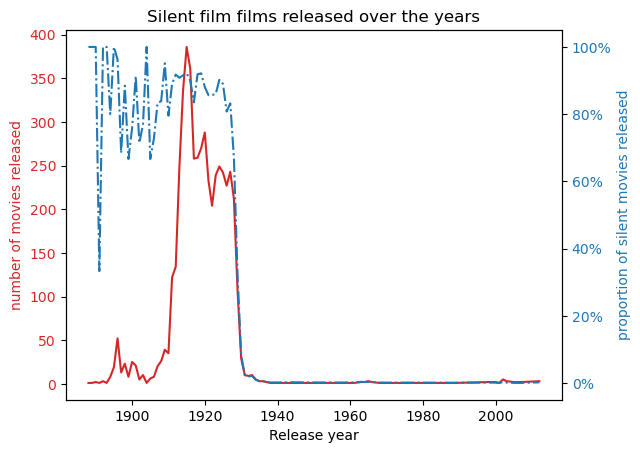

,frequency,total_nb_films
movie_release_date,,
1907.0,20,24
1889.0,1,1
1934.0,5,501
1941.0,1,471
1916.0,361,401


In [4]:
#Dataframe grouping Silent films by year and indicating the number of silent films relased, as well as the total number of films released in that year
mute_films, mute_films_by_year = release_by_genre(movie_metadata)
plot_release_by_genre(mute_films_by_year)

#Display resulting dataframe
mute_films_by_year.sample(5)

### Using a subset of actors that have starred in at least one Silent film

For the analysis of the impact of the arrival of synchronized sound and score in movies on the actor's career, we need to use a subset of actors that have starred in at least one silent movie. We observe here the distribution of number of movies (silent or not) for each actor in that subset.
Notice that the data is heavy-tailed (both axes are in logarithmic scale). A lot of actors in the subset have released only a small number of movies.

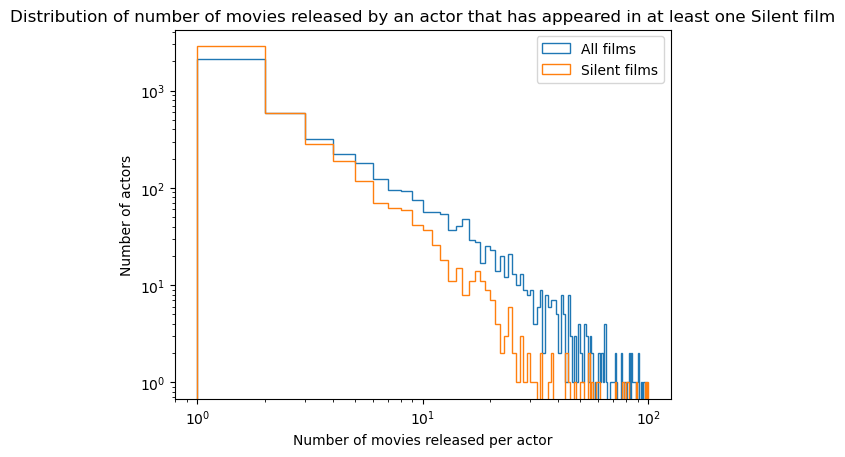

,birth_date,age_last_genre,Silent_appearances,non_Silent_appearances,total_appearances,nb_Silent_appearances,nb_non_Silent_appearances,nb_total_appearances,ratio
actor_name,,,,,,,,,
Julie Carter,NaN,NaN,[1929.0],[],[1929.0],1,0,1,0.00
Aaf ten Hoope,1885.0,40.0,"[1925.0, 1916.0]","[1953.0, 1935.0, 1915.0]","[1925.0, 1953.0, 1916.0, 1935.0, 1915.0]",2,3,5,1.50
Sessue Hayakawa,1889.0,33.0,"[1919.0, 1915.0, 1922.0, 1915.0]","[1949.0, 1959.0, 1950.0, 1960.0, 1955.0, 1931....","[1949.0, 1959.0, 1950.0, 1960.0, 1919.0, 1955....",4,9,13,2.25
Ica von Lenkeffy,1896.0,23.0,"[1917.0, 1917.0, 1917.0, 1918.0, 1917.0, 1919....",[],"[1917.0, 1917.0, 1917.0, 1918.0, 1917.0, 1919....",8,0,8,0.00
Albert Pollet,NaN,NaN,[1922.0],[],[1922.0],1,0,1,0.00


In [5]:
#Character metadata grouped by acotrs, that have starred in at least one silent film 
#For each actor, we indicate the years the actor appears in a movie of the dataset
actors_silent = actors_by_genre(character_metadata, mute_films)
plot_distrib_actors_by_genre(actors_silent)

#Display dataframe
actors_silent.sample(5)

Similarly, we can visualize the distributions of the number of movies each of the actors of the subset have starred in. We can plot the distribution of number of silent films, non-silent films and all films per actor of the subset.
We can interestly observe that the median of the middle distribution is at 0, meaning that at least half of the actors from the subset (ie. actors that have appeared in at least one silent film) have never acted in a non-silent film.

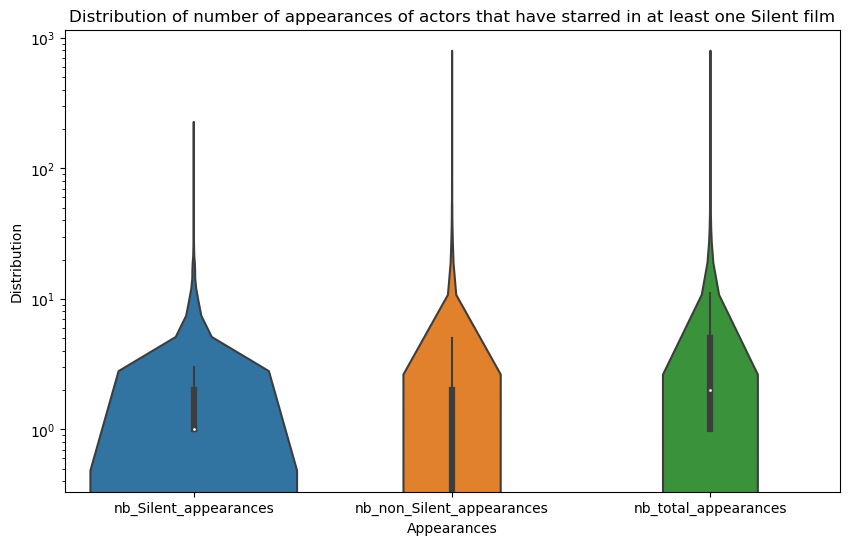

In [6]:
#Create dataframe suitable to plot violin plot for each column
genre = 'Silent'

df = pd.melt(actors_silent[['nb_{}_appearances'.format(genre), 'nb_non_{}_appearances'.format(genre), 'nb_total_appearances']].copy(), 
             var_name='Appearances', value_name='Distribution')

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.violinplot(x='Appearances', y='Distribution', data=df)
plt.title('Distribution of number of appearances of actors that have starred in at least one Silent film')
plt.yscale('log')
plt.show()


### Mean number of releases per actor

As a continuation, we can plot the mean number of movie releases across actors per year. This is done to see if there is a gradual decrease after the introduction of sound in the late 1920's. However there are a few things that are important to note:
- because our data is heavy-tailed, the use of the mean might not be the most appropriate choice, due to its sensitivity to extreme values. Using the median is not an alternative due to it being set to 0 all along. Similarly, the harmonic and geometric mean cannot deal with values set to 0.
- The death and retirement of these actors are a non-negligeable confounder of the decrease in activity after the introduction of sounds. For later analyses, we will in parallel observe the ages of each actor at the time of the transition to remove - to a certain degree- the confounder of death. Unfortunately we do not have the information relative to the actor's death in this dataset.

,count_silent,count_non_silent
actor_name,,
Cesarine Prinz\t,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
'Big Bill' Giddinger,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. Arnold,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. B. Imeson,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. Bromley Davenport,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
Zoltán Szerémy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
rambaldo de goudron,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Ángela Henao,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


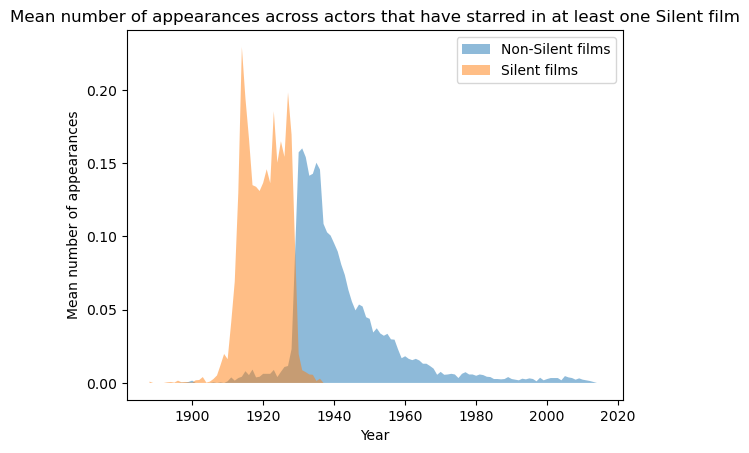

In [7]:
#Helper functions to create vector counting how many films the actor has appeared in for each year
def unique_years(x):
    years = []
    for year in x:
        if ~np.isin(year, years):
            years.append(year)
    return years
def count_per_year(x, range):
    years_appearance = unique_years(x)
    count = []
    for year in range:
        if np.isin(year, years_appearance):
            count.append(x.tolist().count(year))
        else:
            count.append(0)
    return np.asarray(count)

#range of years: 1888-2015
years = range(int(movie_metadata.movie_release_date.min()), int(movie_metadata.movie_release_date.max()))

# Create a new Dataframe containing the number of appearances of eah actor per year (1888-2015)
df_count_per_year = pd.DataFrame({'count_silent' : actors_silent['Silent_appearances'].copy().apply(lambda x : count_per_year(x, years)),
                       'count_non_silent' : actors_silent['non_Silent_appearances'].copy().apply(lambda x : count_per_year(x, years))})

#Display new dataframe
display(df_count_per_year)

#Plot the mean of appearances of actors per year
mean_silent_years = np.mean(np.stack(df_count_per_year.count_silent.values), axis = 0)
mean_non_silent_years = np.mean(np.stack(df_count_per_year.count_non_silent.values), axis = 0)

plt.fill_between(years, mean_non_silent_years, alpha = 0.5, label = 'Non-Silent films')
plt.fill_between(years, mean_silent_years, alpha = 0.5, label = 'Silent films')
plt.ylabel('Mean number of appearances')
plt.xlabel('Year')
plt.title('Mean number of appearances across actors that have starred in at least one Silent film')
plt.legend()
plt.show()


### First Analysis : How many actors survived the "transition"?

We can now answer this question by using the ratio of non-Silent film releases over Silent film release for each actor. We have arbitrarily chosen that actors that have starred in as many non-silent films as silent films have  "survived" the transition. Any actor with a ratio below 1, we believe have not picked up their career after the transition in this first analysis. We have in parallel plotted the distributions of the age of the actor at their latest Silent film release.
- We can firstly see that majority of actors in the subset have not "survived that transition
- The average age of the actors at the time of their latest Silent film is around 40 years-old
- There is around 30% of missing data related to the age of the actors, which is non-negligeable and an obstacle to the analysis
- For further analyses, we could compute the same fractions but only for actors below 50 years old to limit the effect of the confounder of death and retirement.

Fraction of actors whose date of birth is missing: 33.64% 

Fraction of actors whose age at latest Silent film is missing: 33.64% 

63.56% of actors that have starred in at least one silent film have not "survived" the arrival of synchrnized sound and scores in feature films.
The "survival" criterion is defined as such: if an actor has starred in at least as many non silent films as silent films, they have "survived" this transition. 



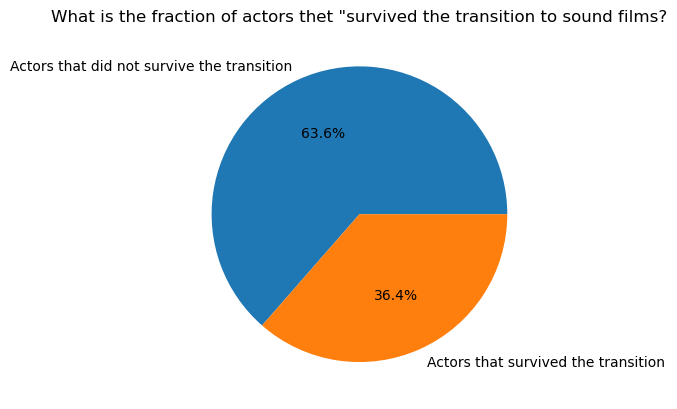

0.58% of actors are outliers: their age at latest silent film are below 0 or above 100 



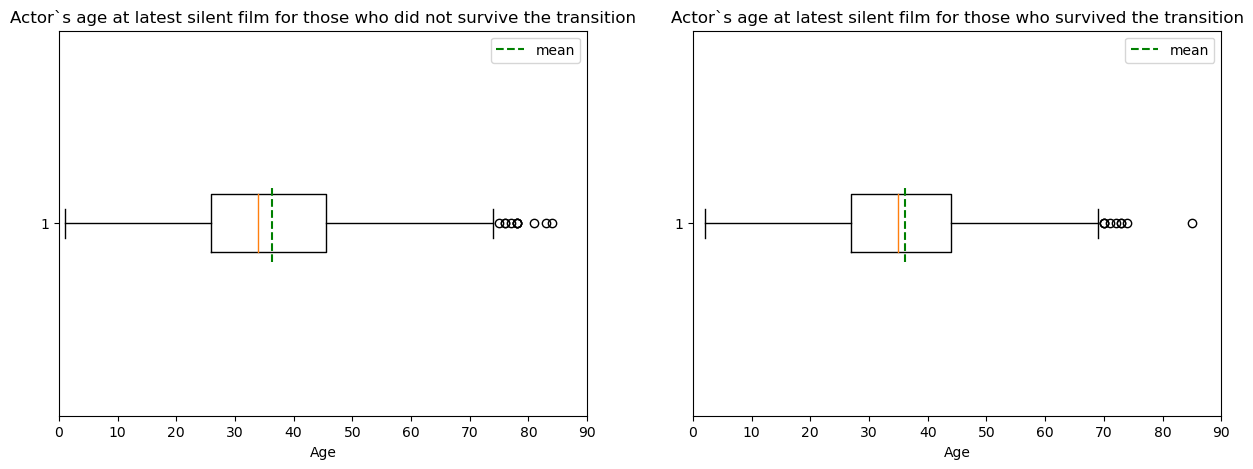

In [8]:
a = actors_silent['birth_date'].isna().sum()/actors_silent.shape[0]
b = actors_silent['age_last_genre'].isna().sum()/actors_silent.shape[0]

print('Fraction of actors whose date of birth is missing: {:.2%}'.format(a))
print('Fraction of actors whose age at latest Silent film is missing: {:.2%} \n'.format(b))

## Fraction of actors that "survived" transition
frac_min = 0.1
idx = actors_silent['ratio'].copy() <= frac_min
frac = idx.sum() / len(idx)

print('{:.2%} of actors that have starred in at least one silent film have not "survived" the arrival of synchrnized sound and scores in feature films.'.format(frac))
print('The "survival" criterion is defined as such: if an actor has starred in at least as many non silent films as silent films, they have "survived" this transition. \n')

#Pie chart
plt.pie([frac, 1-frac], labels = ['Actors that did not survive the transition', 'Actors that survived the transition'], autopct='%1.1f%%')
plt.title('What is the fraction of actors thet "survived the transition to sound films?')
plt.show()

## Average age of actors that "survived" transition
outliers = actors_silent[(actors_silent['age_last_genre'] <= 0) | (actors_silent['age_last_genre'] >= 100)].copy()
print('{:.2%} of actors are outliers: their age at latest silent film are below 0 or above 100 \n'.format(outliers.shape[0]/actors_silent.shape[0]))

actors_silent_filt = actors_silent[(actors_silent['age_last_genre'] > 0) & (actors_silent['age_last_genre'] < 100)].copy()

non_survivors = actors_silent_filt[actors_silent_filt['ratio'] <= frac_min].copy()
survivors = actors_silent_filt[actors_silent_filt['ratio'] >= frac_min].copy()

#Plot the age distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.boxplot(data= non_survivors, x = 'age_last_genre', vert=False)
ax1.vlines(non_survivors.age_last_genre.mean(), ymin = 0.9, ymax = 1.1, color = 'green', ls= '--', label = 'mean')
ax1.set_xlim(0, 90)
ax1.set_xlabel('Age')
ax1.set_title('Actor`s age at latest silent film for those who did not survive the transition')
ax1.legend()

ax2.boxplot(data= survivors, x = 'age_last_genre', vert=False)
ax2.vlines(survivors.age_last_genre.mean(), ymin = 0.9, ymax = 1.1, ls= '--', color = 'green', label = 'mean')
ax2.set_xlim(0, 90)
ax2.set_xlabel('Age')
ax2.set_title('Actor`s age at latest silent film for those who survived the transition')
ax2.legend()
plt.show()


### Data visualization: Black-and-White films and Animated films
Using the movies metadata, we chould perform the same analysis for black-and-white films and the transition to colored films, and the increase of animated films with better animation technologies. However, from the first plot we can observe the following: 
- The proportion of balck-and-white films released over the years, we can see that the transition is much more progressive than synchrnized score and sound films,
- Although the number of animated films have increased over the years, its proportion has remained stable.

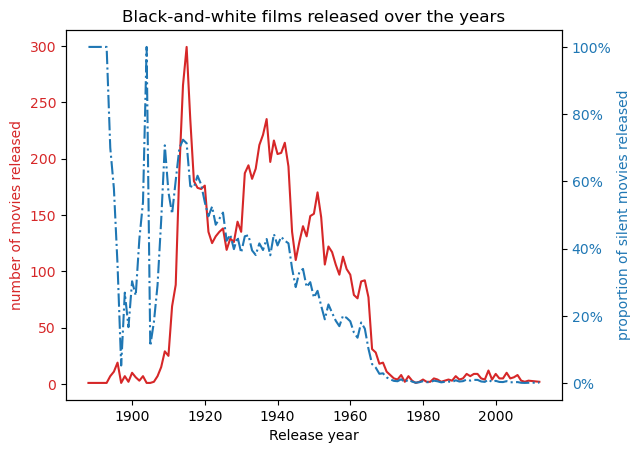

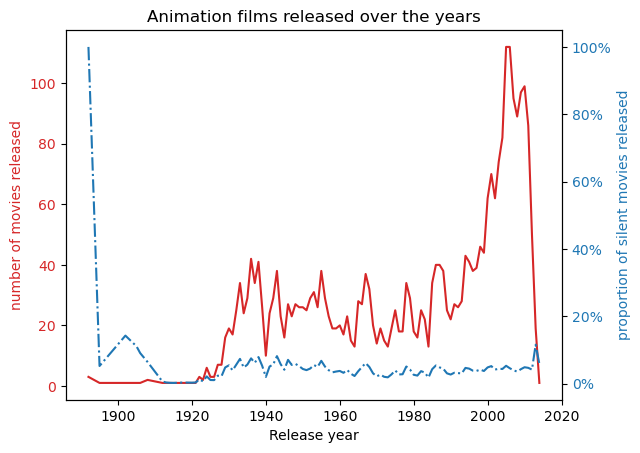

In [9]:
bw_films, bw_films_by_year = release_by_genre(movie_metadata, 'Black-and-white')
plot_release_by_genre(bw_films_by_year, 'Black-and-white')

anim_films, anim_films_by_year = release_by_genre(movie_metadata, 'Animation')
plot_release_by_genre(anim_films_by_year, 'Animation')